<a href="https://colab.research.google.com/github/KengoTobita/Weeyble_Python_startup/blob/master/526handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 最新版であるTensorFlow 2.0を使用してみよう。
今回は利用が簡単なフレームワーク「tensorflow.keras」を使用して簡単なニューラルネットを作成します。

## はじめに TensorFlow 2.0をインストールしよう
pythonのパッケージ管理ソフトウェアである pip を使用して<br>
TensorFlow 2.0を入れましょう。<br>
下記のコードを実行することでインストール可能です。

In [1]:
!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 1.3MB/s 
     |████████████████████████████████| 419kB 43.5MB/s 
     |████████████████████████████████| 3.0MB 36.0MB/s 
     |████████████████████████████████| 61kB 21.2MB/s 
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


## ライブラリのインポートを行う
先ほどの pip install ではライブラリのインストールのみを行いました。<br>
python の import文 を使用して、先ほどのライブラリを読み込みましょう。

In [0]:
import tensorflow as tf
from tensorflow import keras

## データセットを読み込もう
通常、ニューラルネットを作成する際は、なんらかのデータセットを用意します。<br>
今回は「MNIST」と呼ばれる、手書き数字のデータセットを使用します。<br>

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


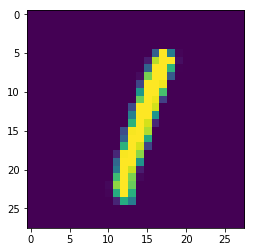

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [34]:
import matplotlib.pyplot as plt

show_image = x_test[5]

plt.imshow(show_image)
plt.show()
print(show_image)

## モデルを作成しよう
tensorflow.kerasのSeaquentialモデルを使用して簡単なニューラルネットを作成してみましょう。<br>
Sequentialモデルとは下記のように、ニューラルネットを簡単に作成することができる記法です。<br>

kerasで使用できるニューラルネットのレイヤは他にも多数あるので、<br>
オフィシャルのドキュメント(なんと日本語！)を読んでいただくと理解が深まります。<br>


In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary() 　#　ココ好き。簡単にモデルを確認することができる。

model.compile(optimizer='SGD', #  オプティマイザを選べる
              loss='sparse_categorical_crossentropy', #  損失関数を選べる。
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


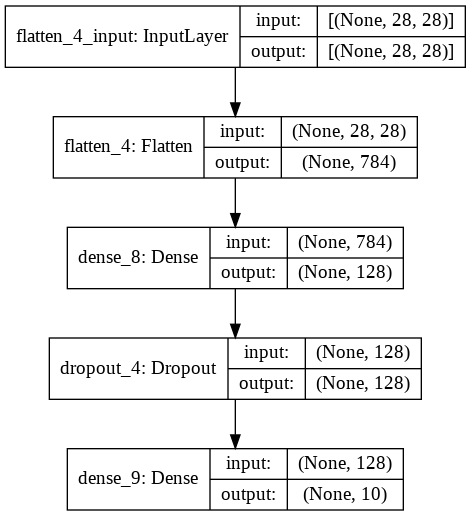

In [23]:
# 普段は使用することが少ないコマンドですが、わかりやすいので。
keras.utils.plot_model(model,show_shapes=True)

In [7]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2934 - accuracy: 0.9144
Epoch 2/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1429 - accuracy: 0.9578
Epoch 3/5
60000/60000 [==============================] - 5s 92us/sample - loss: 0.1098 - accuracy: 0.9666
Epoch 4/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0869 - accuracy: 0.9731
Epoch 5/5
10000/10000 [==============================] - 0s 46us/sample - loss: 0.0723 - accuracy: 0.9784


[0.07226395532395691, 0.9784]

## 回帰問題
ボストン住宅価格データを使用して、回帰もやってみました。
## データセットを読み込もう
通常、ニューラルネットを作成する際は、なんらかのデータセットを用意します。<br>
今回は「ボストンデータセット」と呼ばれる、手書き数字のデータセットを使用します。<br>

In [39]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) =  boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 0us/step


In [67]:
print(y_test)

[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


In [42]:
x_test.shape

(102, 13)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='rmsprop', #  オプティマイザを選べる
              loss='mean_squared_error', #  損失関数を選べる。
              metrics=['mae'])

In [61]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 65        
Total params: 13,441
Trainable params: 13,441
Non-trainable params: 0
_________________________________________________________________


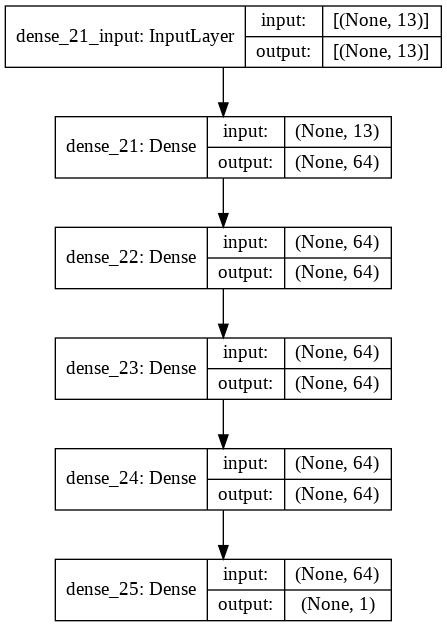

In [62]:
# 普段は使用することが少ないコマンドですが、わかりやすいので。
keras.utils.plot_model(model,show_shapes=True)

In [69]:
model.fit(x_train, y_train, epochs=700)

model.evaluate(x_test, y_test)

Epoch 1/700
404/404 [==============================] - 0s 367us/sample - loss: 2239.5718 - mae: 21.8026
Epoch 2/700
404/404 [==============================] - 0s 63us/sample - loss: 1011.4028 - mae: 25.6762
Epoch 3/700
404/404 [==============================] - 0s 58us/sample - loss: 864.0605 - mae: 22.3920
Epoch 4/700
404/404 [==============================] - 0s 65us/sample - loss: 158.9044 - mae: 9.7905
Epoch 5/700
404/404 [==============================] - 0s 65us/sample - loss: 988.1112 - mae: 24.4720
Epoch 6/700
404/404 [==============================] - 0s 68us/sample - loss: 932.4910 - mae: 27.3204
Epoch 7/700
404/404 [==============================] - 0s 67us/sample - loss: 768.1879 - mae: 24.4589
Epoch 8/700
404/404 [==============================] - 0s 72us/sample - loss: 531.5132 - mae: 19.9109
Epoch 9/700
404/404 [==============================] - 0s 54us/sample - loss: 600.8472 - mae: 16.6474
Epoch 10/700
404/404 [==============================] - 0s 57us/sample - loss: 9

[28.901548647413065, 4.03619]